In [24]:
import numpy as np
from keras import (
    layers, models, regularizers
)
from keras.datasets import reuters

In [25]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000)

In [26]:
word_dict = reuters.get_word_index()
word_dict = {value: key for key, value in word_dict.items()}

In [27]:
for _ in train_data[0]:
    print(word_dict.get(_ - 3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
None
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
None
None
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
None
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [28]:
train_labels[0]

3

In [29]:
train_data.shape

(8982,)

In [30]:
def vectorize(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [31]:
X_train = vectorize(train_data)
X_test = vectorize(test_data)

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# Model

In [34]:
from keras import regularizers

In [35]:
# model = models.Sequential()
# model.add(layers.Dense(40, activation='relu', input_shape = (10000,),
#                        kernel_regularizer=regularizers.l1_l2(l1=0.00005,l2=0.001)))
# model.add(layers.Dropout(0.15))
# model.add(layers.Dense(30, activation='relu',
#                        kernel_regularizer=regularizers.l2(0.0001)))
# model.add(layers.Dropout(0.1))
# model.add(layers.Dense(46, activation='softmax'))

In [62]:
model = models.Sequential()
model.add(layers.Dense(70, activation='relu', input_shape = (10000,),
                       kernel_regularizer=regularizers.l2(l2=0.001)
                       ))
model.add(layers.Dropout(0.75))
model.add(layers.Dense(90, activation='relu',
                       kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(46, activation='softmax'))

In [63]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# old
X_val = X_train[:1000]
partial_X_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [39]:
# n = X_train.shape[0]
# size = 100
# idx = np.random.choice(range(n), size)

# X_val = X_train[idx]
# partial_X_train = X_train[~idx]
# y_val = y_train[idx]
# partial_y_train = y_train[~idx]

# Training

In [64]:
history = model.fit(X_train, y_train,
          epochs=30,
          batch_size=500,
          validation_data=(X_test, y_test))

Epoch 1/30
18/18 [==============================] - 2s 58ms/step - loss: 3.1221 - accuracy: 0.3517 - val_loss: 2.2193 - val_accuracy: 0.5307
Epoch 2/30
18/18 [==============================] - 1s 40ms/step - loss: 2.1655 - accuracy: 0.5011 - val_loss: 1.8058 - val_accuracy: 0.5654
Epoch 3/30
18/18 [==============================] - 1s 42ms/step - loss: 1.8931 - accuracy: 0.5577 - val_loss: 1.6522 - val_accuracy: 0.6460
Epoch 4/30
18/18 [==============================] - 1s 38ms/step - loss: 1.7533 - accuracy: 0.5976 - val_loss: 1.5702 - val_accuracy: 0.6754
Epoch 5/30
18/18 [==============================] - 1s 40ms/step - loss: 1.6696 - accuracy: 0.6244 - val_loss: 1.4953 - val_accuracy: 0.6843
Epoch 6/30
18/18 [==============================] - 1s 44ms/step - loss: 1.5798 - accuracy: 0.6426 - val_loss: 1.4450 - val_accuracy: 0.6937
Epoch 7/30
18/18 [==============================] - 1s 40ms/step - loss: 1.5421 - accuracy: 0.6594 - val_loss: 1.4039 - val_accuracy: 0.6950
Epoch 8/30
18

# Plotting

In [41]:
import matplotlib.pyplot as plt

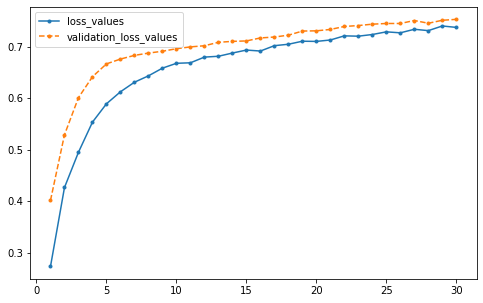

In [42]:
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

fig = plt.figure(figsize=(8,5))
epochs = range(1,len(loss_values) + 1)
plt.plot(epochs, loss_values, '.-',label='loss_values')
plt.plot(epochs, val_loss_values, '.--', label='validation_loss_values')
plt.legend()
# plt.ylim(0.5,0.9)
plt.show()

In [43]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 2s 28ms/step - loss: 1.1569 - accuracy: 0.7529


[1.1569273471832275, 0.7528940439224243]

In [44]:
predictions = model.predict(X_test)

In [45]:
np.sum(predictions[0])

0.99999994

In [46]:
predictions_labels = np.argmax(predictions, axis=1)
predictions_labels

array([ 3, 10,  1, ...,  3,  4,  1], dtype=int64)